In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import json
def plot_db(path, experiment3, offset):
    with open(path+experiment3+'/4.json') as json_file:
        data = json.load(json_file)
    plt.plot(np.array(data['train_loss_history'][offset:])*1)
    plt.plot(np.array(data['valid_loss_history'][offset:])*1)
    plt.axvline(x=data['best_epoch']-offset,color='r')
    plt.grid(True)
    plt.xlabel('epochs')
    plt.ylabel('LOG(L1)')
    plt.xlim(offset)
    plt.title(experiment3)
    plt.legend(['train', 'val', 'best epoch'])
    plt.savefig(path+experiment3+'/tcurve.pdf')

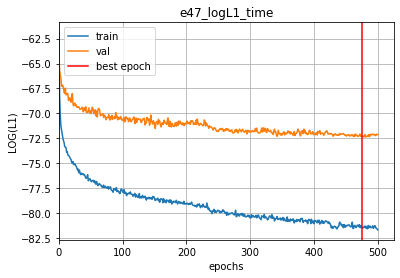

In [2]:
plot_db('/home/enricguso/PycharmProjects/temp_experiments/', 'e47_logL1_time', 0)

In [1]:
import torch


In [31]:
Ys=torch.randn(4,1200,16,2,256).unbind(0)

In [32]:
Ys=[Y_hat-torch.min(Y_hat) for Y_hat in Ys]
Ys=[Y_hat/torch.max(Y_hat) for Y_hat in Ys]

In [33]:
#Our code:
energy = torch.sum(torch.stack(Ys), dim=0)
Y = [Y / (energy + 1e-18) for Y in Ys]

In [38]:
Y = torch.stack(Y)
_, Y = Y.max(0)

In [55]:
Y = torch.nn.functional.one_hot(Y, 4).float().unbind(4)

In [65]:
Y[0][0,0,0,:]+Y[1][0,0,0,:]+Y[2][0,0,0,:]+Y[3][0,0,0,:]

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 

In [66]:
target = torch.tensor([[0,1,0,1,0,0]], dtype=torch.float32)
output = torch.randn(1, 6, requires_grad=True)

In [68]:
output

tensor([[-1.8035, -1.9289, -0.7271, -0.4793,  0.9762,  1.2744]],
       requires_grad=True)

In [69]:
target

tensor([[0., 1., 0., 1., 0., 0.]])